In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

file_path_10 = '/Users/yasudayuuya/BLP_data/【10月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_10 = pd.read_excel(file_path_10, sheet_name=sheet_name)
data_10.head()

/Users/yasudayuuya/BLP_data/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-10-01 00:00:00,2024-10-02 00:00:00,2024-10-03 00:00:00,2024-10-04 00:00:00,2024-10-05 00:00:00,2024-10-06 00:00:00,2024-10-07 00:00:00,2024-10-08 00:00:00,...,2024-10-23 00:00:00,2024-10-24 00:00:00,2024-10-25 00:00:00,2024-10-26 00:00:00,2024-10-27 00:00:00,2024-10-28 00:00:00,2024-10-29 00:00:00,2024-10-30 00:00:00,2024-10-31 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,1756,2125,2433,1490,0,2455,2921,...,2941,2498,2941,1249,0,2893,2264,297,170,57837
4,NaN,作業時間(分),0,4302,4740,7002,4620,0,5544,7026,...,8190,5871,7326,4485,0,6240,5694,771,486,154956


In [2]:
# Excelデータの読み込み
file_path_11 = '/Users/yasudayuuya/BLP_data/【11月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_11 = pd.read_excel(file_path_11, sheet_name=sheet_name)
data_11.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-11-01 00:00:00,2024-11-02 00:00:00,2024-11-03 00:00:00,2024-11-04 00:00:00,2024-11-05 00:00:00,2024-11-06 00:00:00,2024-11-07 00:00:00,2024-11-08 00:00:00,...,2024-11-24 00:00:00,2024-11-25 00:00:00,2024-11-26 00:00:00,2024-11-27 00:00:00,2024-11-28 00:00:00,2024-11-29 00:00:00,2024-11-30 00:00:00,2024-12-01 00:00:00,合計,NaN
2,NaN,日付,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,NaN,NaN
3,A-PaLS,件数,0,2199,0,0,1172,1894,2912,2794,...,1332,2867,3622,3856,2360,1597,1582,0,59330,NaN
4,NaN,作業時間(分),0,5262,0,0,2070,3567,8088,7374,...,4302,9009,7893,9682,8725,7200,4905,0,172247,NaN


In [3]:
file_path_9 = '/Users/yasudayuuya/BLP_data/【9月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_9 = pd.read_excel(file_path_9, sheet_name=sheet_name)
data_9.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-09-01 00:00:00,2024-09-02 00:00:00,2024-09-03 00:00:00,2024-09-04 00:00:00,2024-09-05 00:00:00,2024-09-06 00:00:00,2024-09-07 00:00:00,2024-09-08 00:00:00,...,2024-09-23 00:00:00,2024-09-24 00:00:00,2024-09-25 00:00:00,2024-09-26 00:00:00,2024-09-27 00:00:00,2024-09-28 00:00:00,2024-09-29 00:00:00,2024-09-30 00:00:00,2024-10-01 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,0,1289,1785,1992,2281,1805,0,...,2687,2538,3351,3871,2908,1343,0,863,0,54997
4,NaN,作業時間(分),0,0,3285,3420,6699,6978,5190,0,...,6945,5811,8265,7998,8130,2952,0,2169,0,156935


In [4]:
file_path_12 = '/Users/yasudayuuya/BLP_data/【12月】分析+day.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_12 = pd.read_excel(file_path_12, sheet_name=sheet_name)
data_12.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-12-01 00:00:00,2024-12-02 00:00:00,2024-12-03 00:00:00,2024-12-04 00:00:00,2024-12-05 00:00:00,2024-12-06 00:00:00,2024-12-07 00:00:00,2024-12-08 00:00:00,...,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-28 00:00:00,2024-12-29 00:00:00,2024-12-30 00:00:00,2024-12-31 00:00:00,合計
2,NaN,日付,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,NaN
3,A-PaLS,件数,0,0,1304,1905,2948,2008,2435,0,...,2509,3039,2603,1991,2509,1275,0,0,0,52980
4,NaN,作業時間(分),0,0,2475,4917,7047,6663,5514,0,...,7068,7008,6417,7008,6795,3810,0,0,0,151783


In [5]:
# 行列を逆にする
data_10 = data_10.T
# 1行目を列名にする
data_10.columns = data_10.iloc[1]
# 0,1行目を削除
data_10 = data_10.drop(data_10.index[[0, 1]])
data_10.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),目標件数,NaN,作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ平均,テイケイ,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-10-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,0
Unnamed: 3,NaN,2024-10-02 00:00:00,2,1756,4302,NaN,NaN,7,5,12,4,358.5,439,NaN,NaN,0,NaN,2,2.449886,177.559275
Unnamed: 4,NaN,2024-10-03 00:00:00,3,2125,4740,NaN,NaN,6,6,12,4,395,531.25,NaN,NaN,0,NaN,3,2.230588,195.015823
Unnamed: 5,NaN,2024-10-04 00:00:00,4,2433,7002,NaN,NaN,12,6,18,6,389,405.5,NaN,NaN,0,NaN,4,2.877928,151.150386
Unnamed: 6,NaN,2024-10-05 00:00:00,5,1490,4620,NaN,NaN,13,2,15,5,308,298,NaN,NaN,0,NaN,5,3.100671,140.292208


In [6]:
# 行列を逆にする
data_11 = data_11.T
# 1行目を列名にする
data_11.columns = data_11.iloc[1]
# 0,1行目を削除
data_11 = data_11.drop(data_11.index[[0, 1]])
data_11.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),目標件数,作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ,テイケイ,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-11-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
Unnamed: 3,NaN,2024-11-02 00:00:00,2,2199,5262,NaN,13,5,18,6,292.333333,366.5,NaN,NaN,0,2,2.392906,181.787343
Unnamed: 4,NaN,2024-11-03 00:00:00,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,0
Unnamed: 5,NaN,2024-11-04 00:00:00,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,0,0
Unnamed: 6,NaN,2024-11-05 00:00:00,5,1172,2070,NaN,NaN,6,6,2,345,586,NaN,NaN,0,5,1.766212,246.289855


In [7]:
# 行列を逆にする
data_9 = data_9.T
# 1行目を列名にする
data_9.columns = data_9.iloc[1]
# 0,1行目を削除
data_9 = data_9.drop(data_9.index[[0, 1]])
data_9.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,1日あたりの作業件数,予測,買い合わせ平均,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-09-01 00:00:00,1,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-09-02 00:00:00,2,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
Unnamed: 4,NaN,2024-09-03 00:00:00,3,1289,3285,6,3,0,9,3,365,429.666667,NaN,NaN,NaN,NaN,3,2.548487,170.689498
Unnamed: 5,NaN,2024-09-04 00:00:00,4,1785,3420,6,3,0,9,3,380,595,NaN,NaN,NaN,NaN,4,1.915966,227.039474
Unnamed: 6,NaN,2024-09-05 00:00:00,5,1992,6699,14,4,0,18,6,372.166667,332,NaN,NaN,NaN,NaN,5,3.362952,129.350649


In [8]:
# 行列を逆にする
data_12 = data_12.T
# 1行目を列名にする
data_12.columns = data_12.iloc[1]
# 0,1行目を削除
data_12 = data_12.drop(data_12.index[[0, 1]])
data_12.head()

Unnamed: 1,NaN,項目,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,1日あたりの作業件数,予測,買い合わせ平均,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-12-01 00:00:00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-12-02 00:00:00,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
Unnamed: 4,NaN,2024-12-03 00:00:00,3,1304,2475,8,4,NaN,12,4,206.25,326,NaN,NaN,NaN,NaN,3,1.898006,229.187879
Unnamed: 5,NaN,2024-12-04 00:00:00,4,1905,4917,13,5,NaN,18,6,273.166667,317.5,NaN,NaN,NaN,NaN,4,2.581102,168.532642
Unnamed: 6,NaN,2024-12-05 00:00:00,5,2948,7047,13,5,3,21,7,335.571429,421.142857,NaN,NaN,NaN,NaN,5,2.390434,181.975309


In [9]:
# 欠損値を探す
data_10.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
目標件数           32
NaN            32
作業人数            4
リーダー人数          4
合計作業人数          2
作業ライン           5
1人あたりの作業時間      5
1本あたりの平均作業数     5
予測             32
買い合わせ平均        32
テイケイ            0
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [10]:
# 欠損値を探す
data_11.isnull().sum()

Unnamed: 1
NaN            33
項目              1
日付              2
件数              1
作業時間(分)         1
目標件数           33
作業人数            8
リーダー人数          7
合計作業人数          8
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数     8
予測             33
買い合わせ          33
テイケイ            1
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [11]:
# 欠損値を探す
data_9.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
作業人数            7
リーダー人数          7
テイケイ            2
合計作業人数          4
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数     8
1日あたりの作業件数     32
予測             32
買い合わせ平均        32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [12]:
# 欠損値を探す
data_12.isnull().sum()

Unnamed: 1
NaN            32
項目              0
日付              1
件数              0
作業時間(分)         0
作業人数            8
リーダー人数          8
テイケイ           11
合計作業人数          3
作業ライン           8
1人あたりの作業時間      8
1本あたりの平均作業数    11
1日あたりの作業件数     32
予測             32
買い合わせ平均        32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [13]:
data_10 = data_10.drop(data_10.columns[[0, 1, 5, 12, 13, 14, 18, 19]], axis=1)
data_10.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN,0
Unnamed: 3,2,1756,4302,7,5,12,4,358.5,0
Unnamed: 4,3,2125,4740,6,6,12,4,395,0
Unnamed: 5,4,2433,7002,12,6,18,6,389,0
Unnamed: 6,5,1490,4620,13,2,15,5,308,0


In [14]:
data_11 = data_11.drop(data_11.columns[[0, 1, 5, 11, 12, 13, 16, 17]], axis=1)
data_11.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN,0
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,0
Unnamed: 4,3,0,0,NaN,NaN,NaN,NaN,NaN,0
Unnamed: 5,4,0,0,NaN,NaN,NaN,NaN,NaN,0
Unnamed: 6,5,1172,2070,NaN,6,6,2,345,0


In [15]:
data_9 = data_9.drop(data_9.columns[[0, 1, 11, 12, 13, 14, 15, 17, 18]], axis=1)
data_9.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,NaN,NaN,0,NaN,NaN,NaN
Unnamed: 3,2,0,0,NaN,NaN,0,NaN,NaN,NaN
Unnamed: 4,3,1289,3285,6,3,0,9,3,365
Unnamed: 5,4,1785,3420,6,3,0,9,3,380
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667


In [16]:
data_12 = data_12.drop(data_12.columns[[0, 1, 11, 12, 13, 14, 15, 17, 18]], axis=1)
data_12.head()

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,3,1304,2475,8,4,NaN,12,4,206.25
Unnamed: 5,4,1905,4917,13,5,NaN,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429


In [17]:
# NaNを全て0に変換
data_10 = data_10.fillna(0)
data_10.head()

/var/folders/wl/_sk4lq9107v79smv_pqvls780000gn/T/ipykernel_7959/2710974917.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_10 = data_10.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,0,0,0,0,0.0,0
Unnamed: 3,2,1756,4302,7,5,12,4,358.5,0
Unnamed: 4,3,2125,4740,6,6,12,4,395.0,0
Unnamed: 5,4,2433,7002,12,6,18,6,389.0,0
Unnamed: 6,5,1490,4620,13,2,15,5,308.0,0


In [18]:
# NaNを全て0に変換
data_11 = data_11.fillna(0)
data_11.head()

/var/folders/wl/_sk4lq9107v79smv_pqvls780000gn/T/ipykernel_7959/3095783728.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_11 = data_11.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,0
Unnamed: 4,3,0,0,0,0,0,0,0.000000,0
Unnamed: 5,4,0,0,0,0,0,0,0.000000,0
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,0


In [19]:
# NaNを全て0に変換
data_9 = data_9.fillna(0)
data_9.head()

/var/folders/wl/_sk4lq9107v79smv_pqvls780000gn/T/ipykernel_7959/2000210121.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_9 = data_9.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667


In [20]:
# NaNを全て0に変換
data_12 = data_12.fillna(0)
data_12.head()

/var/folders/wl/_sk4lq9107v79smv_pqvls780000gn/T/ipykernel_7959/1371613324.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_12 = data_12.fillna(0)


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429


In [21]:
# 0列目のデータを表示
data_10.iloc[:, 0]
data_10

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000,0
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000,0
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000,0
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000,0
Unnamed: 7,6,0,0,11,4,15,5,0.000000,0
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000,0
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429,0
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571,0
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857,0


In [22]:
# 0列目のデータを表示
data_11.iloc[:, 0]
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,0
Unnamed: 4,3,0,0,0,0,0,0,0.000000,0
Unnamed: 5,4,0,0,0,0,0,0,0.000000,0
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,0
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333,0
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857,0
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857,0
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000,0
Unnamed: 11,10,0,0,0,0,0,0,0.000000,0


In [23]:
# 0列目のデータを表示
data_9.iloc[:, 0]
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667
Unnamed: 7,6,2281,6978,17,4,0,21,7,332.285714
Unnamed: 8,7,1805,5190,13,2,0,15,5,346.000000
Unnamed: 9,8,0,0,0,0,0,0,0,0.000000
Unnamed: 10,9,2122,6753,17,4,0,21,7,321.571429
Unnamed: 11,10,2813,8346,17,4,0,21,7,397.428571


In [24]:
# 0列目のデータを表示
data_12.iloc[:, 0]
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429
Unnamed: 7,6,2008,6663,13,4,4,21,7,317.285714
Unnamed: 8,7,2435,5514,13,2,0,15,5,367.600000
Unnamed: 9,8,0,0,14,4,3,21,7,0.000000
Unnamed: 10,9,3419,7497,13,4,4,21,7,357.000000
Unnamed: 11,10,2992,7869,13,4,4,21,7,374.714286


In [25]:
# Unnamed: 33と34を削除
data_10 = data_10.drop(data_10.index[[31]])
data_10


Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000,0
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000,0
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000,0
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000,0
Unnamed: 7,6,0,0,11,4,15,5,0.000000,0
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000,0
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429,0
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571,0
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857,0


In [26]:
# Unnamed: 33と34を削除
data_11 = data_11.drop(data_11.index[[31, 32]])
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 2,1,0,0,0,0,0,0,0.000000,0
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,0
Unnamed: 4,3,0,0,0,0,0,0,0.000000,0
Unnamed: 5,4,0,0,0,0,0,0,0.000000,0
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,0
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333,0
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857,0
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857,0
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000,0
Unnamed: 11,10,0,0,0,0,0,0,0.000000,0


In [27]:
# Unnamed: 33と34を削除
data_9 = data_9.drop(data_9.index[[31]])
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667
Unnamed: 7,6,2281,6978,17,4,0,21,7,332.285714
Unnamed: 8,7,1805,5190,13,2,0,15,5,346.000000
Unnamed: 9,8,0,0,0,0,0,0,0,0.000000
Unnamed: 10,9,2122,6753,17,4,0,21,7,321.571429
Unnamed: 11,10,2813,8346,17,4,0,21,7,397.428571


In [28]:
# Unnamed: 33と34を削除
data_12 = data_12.drop(data_12.index[[31]])
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 2,1,0,0,0,0,0,0,0,0.000000
Unnamed: 3,2,0,0,0,0,0,0,0,0.000000
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429
Unnamed: 7,6,2008,6663,13,4,4,21,7,317.285714
Unnamed: 8,7,2435,5514,13,2,0,15,5,367.600000
Unnamed: 9,8,0,0,14,4,3,21,7,0.000000
Unnamed: 10,9,3419,7497,13,4,4,21,7,357.000000
Unnamed: 11,10,2992,7869,13,4,4,21,7,374.714286


In [29]:
# 「件数」数が0の行を削除
data_10 = data_10[data_10['件数'] != 0]
data_10

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 3,2,1756,4302,7,5,12,4,358.500000,0
Unnamed: 4,3,2125,4740,6,6,12,4,395.000000,0
Unnamed: 5,4,2433,7002,12,6,18,6,389.000000,0
Unnamed: 6,5,1490,4620,13,2,15,5,308.000000,0
Unnamed: 8,7,2455,5544,11,4,15,5,369.600000,0
Unnamed: 9,8,2921,7026,18,3,21,7,334.571429,0
Unnamed: 10,9,2138,7905,17,4,21,7,376.428571,0
Unnamed: 11,10,1921,7332,17,4,21,7,349.142857,0
Unnamed: 12,11,2197,7491,17,4,21,7,356.714286,0
Unnamed: 13,12,1978,5634,16,2,18,6,313.000000,0


In [30]:
# 「件数」数が0の行を削除
data_11 = data_11[data_11['件数'] != 0]
data_11

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,テイケイ
Unnamed: 3,2,2199,5262,13,5,18,6,292.333333,0
Unnamed: 6,5,1172,2070,0,6,6,2,345.000000,0
Unnamed: 7,6,1894,3567,5,4,9,3,396.333333,0
Unnamed: 8,7,2912,8088,17,4,21,7,385.142857,0
Unnamed: 9,8,2794,7374,17,4,21,7,351.142857,0
Unnamed: 10,9,3176,8283,13,2,15,5,552.200000,0
Unnamed: 12,11,2679,7782,17,4,21,7,370.571429,0
Unnamed: 13,12,2573,7017,18,3,21,7,334.142857,0
Unnamed: 14,13,1739,6612,18,3,21,7,314.857143,0
Unnamed: 15,14,2405,6405,17,4,21,7,305.000000,0


In [31]:
# 「件数」数が0の行を削除
data_9 = data_9[data_9['件数'] != 0]
data_9

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 4,3,1289,3285,6,3,0,9,3,365.000000
Unnamed: 5,4,1785,3420,6,3,0,9,3,380.000000
Unnamed: 6,5,1992,6699,14,4,0,18,6,372.166667
Unnamed: 7,6,2281,6978,17,4,0,21,7,332.285714
Unnamed: 8,7,1805,5190,13,2,0,15,5,346.000000
Unnamed: 10,9,2122,6753,17,4,0,21,7,321.571429
Unnamed: 11,10,2813,8346,17,4,0,21,7,397.428571
Unnamed: 12,11,2251,8009,17,4,0,21,7,381.380952
Unnamed: 13,12,2991,8109,17,4,0,21,7,386.142857
Unnamed: 14,13,2793,7836,17,4,0,21,7,373.142857


In [32]:
# 「件数」数が0の行を削除
data_12 = data_12[data_12['件数'] != 0]
data_12

Unnamed: 1,日付,件数,作業時間(分),作業人数,リーダー人数,テイケイ,合計作業人数,作業ライン,1人あたりの作業時間
Unnamed: 4,3,1304,2475,8,4,0,12,4,206.250000
Unnamed: 5,4,1905,4917,13,5,0,18,6,273.166667
Unnamed: 6,5,2948,7047,13,5,3,21,7,335.571429
Unnamed: 7,6,2008,6663,13,4,4,21,7,317.285714
Unnamed: 8,7,2435,5514,13,2,0,15,5,367.600000
Unnamed: 10,9,3419,7497,13,4,4,21,7,357.000000
Unnamed: 11,10,2992,7869,13,4,4,21,7,374.714286
Unnamed: 12,11,1886,7983,14,3,4,21,7,380.142857
Unnamed: 13,12,2307,7574,14,4,3,21,7,360.666667
Unnamed: 14,13,2118,7395,14,4,3,21,7,352.142857


In [33]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_10 = data_10.mean()
original_std_10 = data_10.std()
print(original_mean_10)
print(original_std_10)

Unnamed: 1
日付              16.500000
件数            2224.500000
作業時間(分)       5959.846154
作業人数            14.346154
リーダー人数           3.423077
合計作業人数          17.769231
作業ライン            5.923077
1人あたりの作業時間     324.635165
テイケイ             0.000000
dtype: float64
Unnamed: 1
日付               8.949860
件数             789.490633
作業時間(分)       1963.673979
作業人数             4.372114
リーダー人数           1.270372
合計作業人数           4.641618
作業ライン            1.547206
1人あたりの作業時間      75.081417
テイケイ             0.000000
dtype: float64


In [34]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_11 = data_11.mean()
original_std_11 = data_11.std()
print(original_mean_11)
print(original_std_11)

Unnamed: 1
日付              17.200000
件数            2373.200000
作業時間(分)       6889.880000
作業人数            15.040000
リーダー人数           3.920000
合計作業人数          18.960000
作業ライン            6.320000
1人あたりの作業時間     364.869905
テイケイ             0.000000
dtype: float64
Unnamed: 1
日付               8.276473
件数             675.897058
作業時間(分)       1746.216704
作業人数             5.223983
リーダー人数           2.100000
合計作業人数           4.217819
作業ライン            1.405940
1人あたりの作業時間      56.735581
テイケイ             0.000000
dtype: float64


In [35]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_9 = data_9.mean()
original_std_9 = data_9.std()
print(original_mean_9)
print(original_std_9)

Unnamed: 1
日付              16.166667
件数            2291.541667
作業時間(分)       6538.958333
作業人数            15.250000
リーダー人数           3.125000
テイケイ             0.000000
合計作業人数          18.375000
作業ライン            6.125000
1人あたりの作業時間     353.801587
dtype: float64
Unnamed: 1
日付               8.244454
件数             698.728160
作業時間(分)       1875.513483
作業人数             4.002716
リーダー人数           0.899879
テイケイ             0.000000
合計作業人数           4.537884
作業ライン            1.512628
1人あたりの作業時間      46.951341
dtype: float64


In [36]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_12 = data_12.mean()
original_std_12 = data_12.std()
print(original_mean_12)
print(original_std_12)

Unnamed: 1
日付              15.565217
件数            2303.478261
作業時間(分)       6599.260870
作業人数            14.521739
リーダー人数           3.173913
テイケイ             2.391304
合計作業人数          20.086957
作業ライン            6.695652
1人あたりの作業時間     326.301967
dtype: float64
Unnamed: 1
日付               7.873004
件数             522.434674
作業時間(分)       1346.534819
作業人数             2.086092
リーダー人数           1.072473
テイケイ             1.405804
合計作業人数           2.294520
作業ライン            0.764840
1人あたりの作業時間      49.337949
dtype: float64


In [37]:
# データの結合
data_9_10_12 = pd.concat([data_9, data_10, data_12])

In [38]:
# 対数変換
data_9_10_12 = data_9_10_12.apply(lambda x: np.log(x + 1))
data_11 = data_11.apply(lambda x: np.log(x + 1))

In [39]:
# カラム名の順番を合わせる
data_9_10_12 = data_9_10_12[data_11.columns]

In [40]:
# 目的変数と説明変数の設定
X_train = data_9_10_12.drop(columns='件数', errors='ignore')
y_train = data_9_10_12['件数']
X_test = data_11.drop(columns='件数', errors='ignore')
y_test = data_11['件数']

# ベイズ最適化

In [44]:
from bayes_opt import BayesianOptimization
import joblib
from sklearn.model_selection import cross_val_score

def optimize_gbr_cv(n_estimators, learning_rate, max_depth, max_features, min_samples_split, subsample):
    model = GradientBoostingRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        max_features=max_features,
        min_samples_split=int(min_samples_split),
        subsample=subsample,
        random_state=42
    )
    # CVでの平均R²スコアを返す
    return cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

# ハイパーパラメータの範囲を設定
pbounds = {
    'n_estimators': (100, 1000),
    'learning_rate': (0.005, 0.3),
    'max_depth': (3, 10),
    'min_samples_split': (2, 20),
    'subsample': (0.5, 1.0),
    'max_features': (0.5, 1.0)

}

# ベイズ最適化の設定および実行
optimizer = BayesianOptimization(
    f=optimize_gbr_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=25)

# 最良のパラメータを取得し、最適なモデルを作成
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['subsample'] = best_params['subsample']
best_params['max_features'] = best_params['max_features']


print("Best parameters found: ", best_params)

best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# テストデータでの予測
y_pred = best_model.predict(X_test)

# 精度の評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test Mean Squared Error: {mse}')
print(f'Test R² Score: {r2}')


# モデル保存（拡張子は .pkl が多い）
# 学習に使った特徴量（カラム名と順番）を保存しておく
feature_names = X_train.columns.tolist()
joblib.dump((best_model, feature_names), 'model.pkl2')

print("モデルを保存しました。")

|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.1089    | 0.1155    | 9.655     | 0.866     | 12.78     | 240.4     | 0.578     |
| 2         | 0.2644    | 0.02213   | 9.063     | 0.8006    | 14.75     | 118.5     | 0.985     |
| 3         | -0.04079  | 0.2506    | 4.486     | 0.5909    | 5.301     | 373.8     | 0.7624    |
| 4         | 0.1317    | 0.1324    | 5.039     | 0.8059    | 4.511     | 362.9     | 0.6832    |
| 5         | 0.002099  | 0.1395    | 8.496     | 0.5998    | 11.26     | 633.2     | 0.5232    |
| 6         | 0.2392    | 0.04943   | 9.529     | 0.6915    | 15.13     | 118.3     | 0.6026    |
| 7         | 0.2342    | 0.04105   | 6.477     | 0.591     | 10.85     | 119.8     | 0.6762    |
| 8         | 0.03141   | 0.2065    | 3.862     | 0.9707    | 17.15     | 120.5     | 0.5888    |
| 9         | 0.1963

In [45]:
# 全てのデータに対して
# 予測を行う
y_pred = best_model.predict(X_test)

# 予測結果を元に戻す
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    print(f'Predicted: {y_pred_original[i]}')
    print(f'Actual: {y_test_original.iloc[i]}')
    print(f'Difference: {y_pred_original[i] - y_test_original.iloc[i]}')
    print('----------')

Predicted: 1993.9229070466502
Actual: 2199.9999999999995
Difference: -206.0770929533494
----------
Predicted: 558.411373646102
Actual: 1173.0000000000005
Difference: -614.5886263538985
----------
Predicted: 1313.0821069683777
Actual: 1895.0000000000002
Difference: -581.9178930316225
----------
Predicted: 2750.853666809676
Actual: 2912.999999999999
Difference: -162.14633319032328
----------
Predicted: 2220.6493340268116
Actual: 2795.0000000000005
Difference: -574.3506659731888
----------
Predicted: 2984.8571869981147
Actual: 3177.0000000000014
Difference: -192.14281300188668
----------
Predicted: 2227.9051557891826
Actual: 2680.0
Difference: -452.0948442108174
----------
Predicted: 2479.5143493909063
Actual: 2574.000000000001
Difference: -94.48565060909459
----------
Predicted: 2406.1404893659555
Actual: 1740.0000000000005
Difference: 666.1404893659551
----------
Predicted: 2386.798389434649
Actual: 2405.999999999999
Difference: -19.201610565350165
----------
Predicted: 2795.44344252643

In [46]:
# 表にして表示
df = pd.DataFrame({'Predicted': y_pred_original, 'Actual': y_test_original, 'Difference': y_pred_original - y_test_original})
df

,Predicted,Actual,Difference
Unnamed: 3,1993.922907,2200.0,-206.077093
Unnamed: 6,558.411374,1173.0,-614.588626
Unnamed: 7,1313.082107,1895.0,-581.917893
Unnamed: 8,2750.853667,2913.0,-162.146333
Unnamed: 9,2220.649334,2795.0,-574.350666
Unnamed: 10,2984.857187,3177.0,-192.142813
Unnamed: 12,2227.905156,2680.0,-452.094844
Unnamed: 13,2479.514349,2574.0,-94.485651
Unnamed: 14,2406.140489,1740.0,666.140489
Unnamed: 15,2386.798389,2406.0,-19.201611


In [47]:
# differenceの絶対値を合計
df['Difference'].abs().sum()
print(df['Difference'].abs().sum())

9998.9724679279


In [48]:
# differenceの合計
df['Difference'].sum()
print(df['Difference'].sum())

-411.7080331488312


In [49]:
# differenceの標準偏差を取得
df['Difference'].std()
print(df['Difference'].std())

493.9311969456901


In [50]:
# differenceの平均
df['Difference'].mean()
print(df['Difference'].mean())


-16.468321325953248


In [51]:
# 予測結果がプラス・マイナス100件に収まっている数を数える
# プラス・マイナス100件に収まっている数をカウントする変数
within_100_count = 0

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    diff = y_pred_original[i] - y_test_original.iloc[i]
    
    # 差がプラス・マイナス100件に収まっている場合
    if abs(diff) <= 100:
        within_100_count += 1

# 結果を表示
print(f'プラス・マイナス100件に収まっている数: {within_100_count}')

プラス・マイナス100件に収まっている数: 5


In [52]:
# 予測結果がプラス・マイナス100件に収まっている数を数える
# プラス・マイナス100件に収まっている数をカウントする変数
within_200_count = 0

# 各インデックスごとに比較結果を表示
for i in range(len(X_test)):
    diff = y_pred_original[i] - y_test_original.iloc[i]
    
    # 差がプラス・マイナス200件に収まっている場合
    if abs(diff) <= 200:
        within_200_count += 1

# 結果を表示
print(f'プラス・マイナス200件に収まっている数: {within_200_count}')

プラス・マイナス200件に収まっている数: 8


In [53]:
# 特徴量重要度を表示
feature_importances = best_model.feature_importances_
features = data_9_10_12.drop(columns='件数', errors='ignore').columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
df

,features,importance
1,作業時間(分),0.242530
6,1人あたりの作業時間,0.188924
5,作業ライン,0.178779
4,合計作業人数,0.149260
0,日付,0.141132
2,作業人数,0.087821
3,リーダー人数,0.006802
7,テイケイ,0.004752


Note: you may need to restart the kernel to use updated packages.


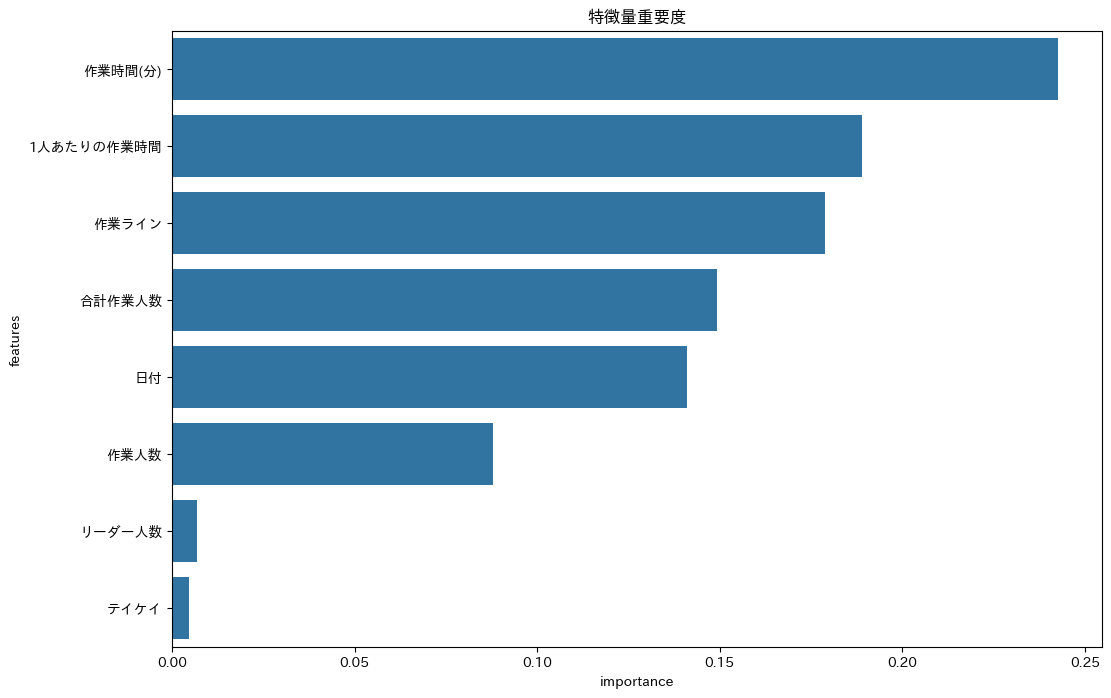

In [54]:
# 特徴量重要度を可視化
%pip install matplotlib seaborn japanize-matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度')
plt.show()

In [55]:
# SHAPのインポートと初期化
import shap
shap.initjs()

# SHAP値の計算
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP値をDataFrameに変換
shap_values_df = pd.DataFrame(shap_values, columns=X_test.columns)

# 特徴量ごとのSHAP値の平均を計算
shap_values_mean_df = shap_values_df.abs().mean().reset_index()
shap_values_mean_df.columns = ['Feature', 'Mean SHAP Value']
shap_values_mean_df = shap_values_mean_df.sort_values(by='Mean SHAP Value', ascending=False)

# SHAP値を表形式で表示
print("\nSHAP値の平均値（特徴量ごと）:")
print(shap_values_mean_df)


SHAP値の平均値（特徴量ごと）:
      Feature  Mean SHAP Value
1     作業時間(分)         0.108978
6  1人あたりの作業時間         0.054740
2        作業人数         0.040290
4      合計作業人数         0.034399
5       作業ライン         0.033890
0          日付         0.031807
3      リーダー人数         0.012054
7        テイケイ         0.001049


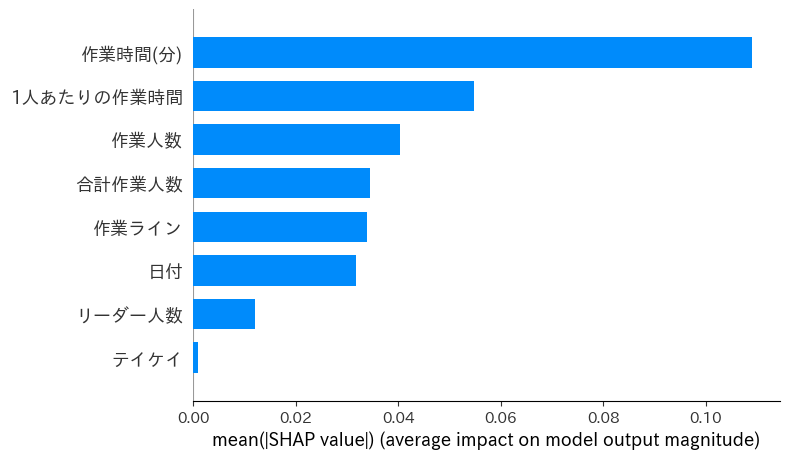

In [56]:
# SHAP値を計算
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP値を可視化
shap.summary_plot(shap_values, X_test, plot_type='bar')

### ファイルによって処理が異なるところ
・それぞれの月の日数

・カラムの順番

・いらないカラムの削除